In [1]:
#Generate plot of abundance of narna vs. fungi
#4/6/2020 HR

In [1]:
import pandas as pd
import numpy as np
from ete3 import NCBITaxa
ncbi = NCBITaxa()
import seaborn as sns

sns.set_style("white", {"font": 'Helvetica'})

In [2]:
# do this once
#ncbi.update_taxonomy_database()

In [3]:
def get_desc_contigs(contig_df, txid):
    taxa = ncbi.get_descendant_taxa(txid, intermediate_nodes=True)
    taxa.append(txid)
    df = contig_df[contig_df["taxid"].apply(lambda x: x in taxa)]
    return df

In [4]:
# Read in (output of process_contigs_singleton_fig.ipynb)
gitdir = "/Users/Hanna/Desktop/MyBox/aa_DeRisi/mosquito/california-mosquito-study/"

with open(gitdir +"/figures/fig3/all_contigs_df_new.tsv", "r") as f:
    all_contigs = pd.read_csv(f, sep="\t")

In [5]:
viral_sum = all_contigs[all_contigs['poly_group']==493]
viral_sum = viral_sum.groupby(['sample'], as_index=False).agg({'read_prop': sum} )
viral_sum = viral_sum.assign(sample_trunc = ['_'.join(x.split('_')[0:2]) for x in viral_sum['sample'] ] )

In [6]:
fungi_contigs = get_desc_contigs(all_contigs, 4751)
fungi_sum = fungi_contigs.groupby(['sample'], as_index=False).agg({'read_prop': sum} )
fungi_sum['sample_trunc'] = ['_'.join(x.split('_')[0:2]) for x in fungi_sum['sample'] ]

In [7]:
df = fungi_sum.merge(viral_sum[['sample_trunc','read_prop']], on='sample_trunc', how='outer', suffixes = ('_fungi','_CxNV1'))


fungi_min is 1.0573730623638631e-05
narna_min is 0.020862970079390752


(0.005, 0.9391162356704879)

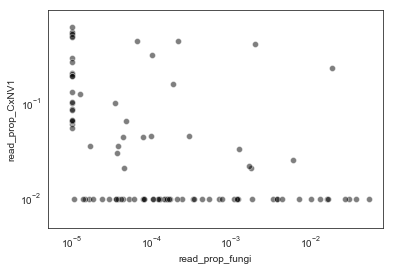

In [8]:
my_data = df

print("fungi_min is " + str(my_data.min(skipna=True)[0]))
print("narna_min is " + str(my_data.min(skipna=True)[1]))

xmin = 1e-05
ymin = 1e-02 #1e-03

myx = (xmin/2, my_data.max(skipna=True)[0]*1.5)
myy = (ymin/2, my_data.max(skipna=True)[1]*1.5)

my_data['read_prop_fungi'].fillna(xmin, inplace=True)
my_data['read_prop_CxNV1'].fillna(ymin, inplace=True)

f = sns.scatterplot(x='read_prop_fungi', y='read_prop_CxNV1', data=my_data,
                   alpha=0.5, color='black')
ax = f.axes

f.set(xscale='log', yscale='log')
ax.set_xlim(myx)
ax.set_ylim(myy)

In [9]:
figure = f.get_figure()
figure.savefig(gitdir +"/figSX_narna_fungi_correlation.pdf", bbox_inches = "tight")